# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.3: Multicolinearity

### 1.3.3 Colinearity

Colinearity is the state of two independent variables being highly correlated. In this case, one of the assumptions behind the OLS estimator is broken, specifically that the variables can not have a linear relationship. Technically, colinearity refers to the case when two variables are *perfectly* correlated, but in practice it is often used to mean "very highly correlated and causing a problem". 

What kinds of problems does colinearity create? If two variables are perfectly correlated, then the OLS estimator equation cannot be computed at all ($X'X$ has no inverse).  In practice, the problem is that the linear model cannot distinguish between the two variables. Sometimes this still results in a useful model, and sometimes it does not. It may cause some variables to appear to be insignificant in the relationship when they really are - in other words, their "weight" is transferred to another, correlated value.

In cases of colinearity causing a problem with your model, check for a few obvious things first:

1. That you haven't added a variable twice. This can happen through a coding problem (the very same variable appears twice) or through a data problem (you join two tables that have the same data, with different names). In this case, remove a duplicate.
2. Check for redundant variables. A redundant variable adds no explanatory power by itself, and instead ends up simply confusing the model. An example would be having a parameter "total family income" and another two indicating "income of first parent" and "income of second parent". The first variable is simply the sum of the next two (at least, in most cases).
3. Use a different model, such as a Ridge Regression, which can better handle this type of issue
4. Combine the features into a set of linearly separable features. We will see the PCA algorithm in the next set of modules, an algorithm that can do this.

Note that due to these reasons, you shouldn't remove variables that appear insignificant in a model affected by colinearity - they may be the ones with colinearity and actually have a high predictive power.

To detect colinearity, compute the pairwise correlation between each set of variables. Many correlation functions do this for you, for instance `pd.corr`:

In [1]:
%run setup.ipy

In [2]:
# Let's load a dataset from the scikit learn repository
# scikit-learn is a machine learning library, and has a few sample datasets 
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()

In [4]:
def sklearn_to_df(sklearn_dataset):
    # A helper function to convert the scikit-learn dataset to a pandas DataFrame
    # From: https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset/46379878#46379878
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

In [5]:
boston = sklearn_to_df(boston_data)

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
C = boston.corr()

In [8]:
def colour_large_values_red(val):
    """Colour cells based on their value - a useful pattern for reports!"""
    color = 'red' if abs(val) > 0.9 else 'lightgrey'
    return 'background-color: %s' % color

In [9]:
C.style.applymap(colour_large_values_red)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Here we see a high correlation between the RAD and TAX variables. This is quite interesting, as the variables themselves are not-obviously so related. Here is what the dataset's description has to say:


        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000

So it appears that a high accessibility to the highway results in a higher property tax rate.

#### Exercises

1. Train a linear model using just the RAD and TAX variables, and examine the beta values. Train another two, this time using just RAD and another using just TAX. Note the difference in the beta values, indicating that the linear relationship was getting in the way of the linear model.
2. Create a dataset with two independent variables ($X_1$ and $X_2$) and a dependent variable $Y$ with the following properties. What does the pairwise correlation look like, and how does this affect the linear regression model?
    - $X_1$ has a high correlation to $Y$ 
    - $X_2$ has a high correlation to $Y$
    

In [13]:

# Exercise 1  (note the interference also of the constant in the models)

import statsmodels.formula.api as smf
est_both = smf.ols(formula='target ~ RAD + TAX', data=boston).fit()

est_both.summary()  # For me, RAD beta is 0.2762, TAX is -0.0386 (nearly zero)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     75.66
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.88e-29
Time:                        22:49:26   Log-Likelihood:                -1773.7
No. Observations:                 506   AIC:                             3553.
Df Residuals:                     503   BIC:                             3566.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6359      1.347     26.465      0.000      32.990      38.281
RAD            0.2762      0.100      2.770      0.006       0.080       0.472
TAX           -0.0386      0.005     -7.485      0.000      -0.049      -0.028
==============================================================================
Omnibus:                      170.143   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.175
Skew:                           1.637   Prob(JB):                    2.68e-106
Kurtosis:                       6.513   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:

est_rad = smf.ols(formula='target ~ RAD', data=boston).fit()
est_rad.summary()  # RAD coeff = -0.4031


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           5.47e-19
Time:                        22:49:33   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3821      0.562     46.964      0.000      25.278      27.486
RAD           -0.4031      0.043     -9.269      0.000      -0.489      -0.318
==============================================================================
Omnibus:                      149.634   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.231
Skew:                           1.515   Prob(JB):                     9.86e-79
Kurtosis:                       5.803   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:

est_tax = smf.ols(formula='target ~ TAX', data=boston).fit()
est_tax.summary()  # TAX coeff = -0.0256


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           5.64e-29
Time:                        22:49:36   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9707      0.948     34.768      0.000      31.108      34.834
TAX           -0.0256      0.002    -11.906      0.000      -0.030      -0.021
==============================================================================
Omnibus:                      172.501   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.072
Skew:                           1.661   Prob(JB):                    5.17e-108
Kurtosis:                       6.521   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:

# Exercise 2

Y = np.random.random(1000)

X1 = Y * 3 + 5
X2 = Y / 2

data = pd.Series({"X1": X1, "X2": X2, "Y": Y})

est_corr = smf.ols(formula="Y ~ X1 + X2", data=data).fit()
est_corr.summary()  # note how the sum of the beta values is about 1 - they are interfering with each other

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.498e+33
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:50:41   Log-Likelihood:                 34818.
No. Observations:                1000   AIC:                        -6.963e+04
Df Residuals:                     998   BIC:                        -6.962e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9677   2.56e-17  -3.78e+16      0.000      -0.968      -0.968
X1             0.1935   3.09e-18   6.26e+16      0.000       0.194       0.194
X2             0.8387   2.18e-17   3.84e+16      0.000       0.839       0.839
==============================================================================
Omnibus:                       18.724   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.510
Skew:                          -0.096   Prob(JB):                      0.00317
Kurtosis:                       2.510   Cond. No.                     3.60e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.41e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

*For solutions, see `solutions/correlations.py`*

### Multicolinearity

Multicolinearity is simply the case where there are **multi**ple **colinearities** in the dataset - that is, many of the variables are related. In this case, the affect on the result is usually higher and may affect the model more. However, the process for managing stays the same as the points mentioned above.

It is also worth noting that multicolinearity and colinearity, at least in the practical sense, are *degrees* and not absolutes. A variable may have lesser or greater colinearity, but there is no threshold above which we say that the colinearity exists. Usually, we would say values above 0.9 definitely have it, and values lesser may have it.

For instance, we can repeat the above table to suddenly "observe multicolinearity":


In [27]:
def colour_medium_values_red(val):
    color = 'red' if abs(val) > 0.7 else 'lightgrey'
    return 'background-color: %s' % color
C.style.applymap(colour_medium_values_red)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In this case, the "new" colinear variable pairs will likely have a lesser effect on the result, but they were always there, having some effect, regardless of how we define colinearity. It is for this reason, the degrees of multicollinearity, that there is no specific "test" that can say definitively that there is multicollinearity, or whether it is causing a problem.

Let's review the model we saw in the last module:

In [28]:
import statsmodels.formula.api as smf
est = smf.ols(formula='target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=boston).fit()  # Does the constant for us

In [29]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 13 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        22:55:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that a warning has been produced indicating there there may be strong multicollinearity (or other numerical problems, but we will investigate the multicollinearity). The "condition" number is very large:

In [30]:
est.condition_number   # In general, values above 20 indicate a problem

15113.517599135064

Another way to see if multicollinearity is causing a problem is to check if the overall predictive power ($R^2$) appears high, but the individual t-statistics for each variable are low, having very wide confidence intervals. This indicates multicollinearity is likely at work, as the individual variables do not have much predictive power, but the overall model is still working.

As mentioned earlier, any non-perfect multicollinearity still gives a good OLS estimator. What is perhaps surprising, is that such a model is still the Best Linear Unbiased Estimator for that model. This idea of OLS producing the Best Linear Unbiased Estimator comes from the Gauss-Markov theorem and is commonly referred to as the OLS being **BLUE**. This shows that for the given inputs, the OLS estimator produces the best model it can. Note, however, there may be a better combination of features or some other data manipulation that produces a better result (such as taking the log values of the inputs).

#### Exercises

1. Research the Gauss-Markov theorem for BLUE. What are the key assumptions behind this finding? You'll see the word "homoscedastic", which we will investigate further in later modules.


#### Extended exercise
Another way to check multicollinearity is to see how stable coefficients for your input variables are when you change the sample of data. On this front, write code that performs the following test:

1. Take a sample and compute the estimator using OLS
2. Extract all coefficients from the model (check the `statsmodels` documentation)
3. Repeat steps 1 & 2 many times (on the order of 100 or so should be fine)
4. Plot the distribution of coefficients for each variable on separate graphs

If there is a wide range in the values, multicollinarity may be a problem.

Other tests for multicollinearity include altering the model slightly and observing large changes in the coefficients, particularly is the sign of the coefficient changes, i.e. a variable had a positive coefficient, and adding/removing a different, unrelated variable makes it suddenly negative - indicative of a problem.

In [31]:
# Exercise 1: The wikipedia article is good on this topic: https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem

# Extended exercise

def run_experiment(data, target_variable_name='target', sample_size=100):
    """Fits an OLS to the data, predicting the target from all other variables
    """
    sample = data.sample(sample_size)
    column_names = [col for col in data.columns if col != target_variable_name]
    # Create formula, predicting target from the sum of all others
    formula = "{} ~ {}".format(target_variable_name, str.join(" + ", column_names))
    model = smf.ols(formula=formula, data=sample).fit()
    return model.params


# example: 
print(run_experiment(boston))


Intercept    40.511774
CRIM         -0.043818
ZN            0.057004
INDUS        -0.080938
CHAS          9.216110
NOX         -11.625047
RM            3.092072
AGE          -0.007933
DIS          -2.092903
RAD           0.089406
TAX          -0.008439
PTRATIO      -0.837235
B             0.009267
LSTAT        -0.598706
dtype: float64


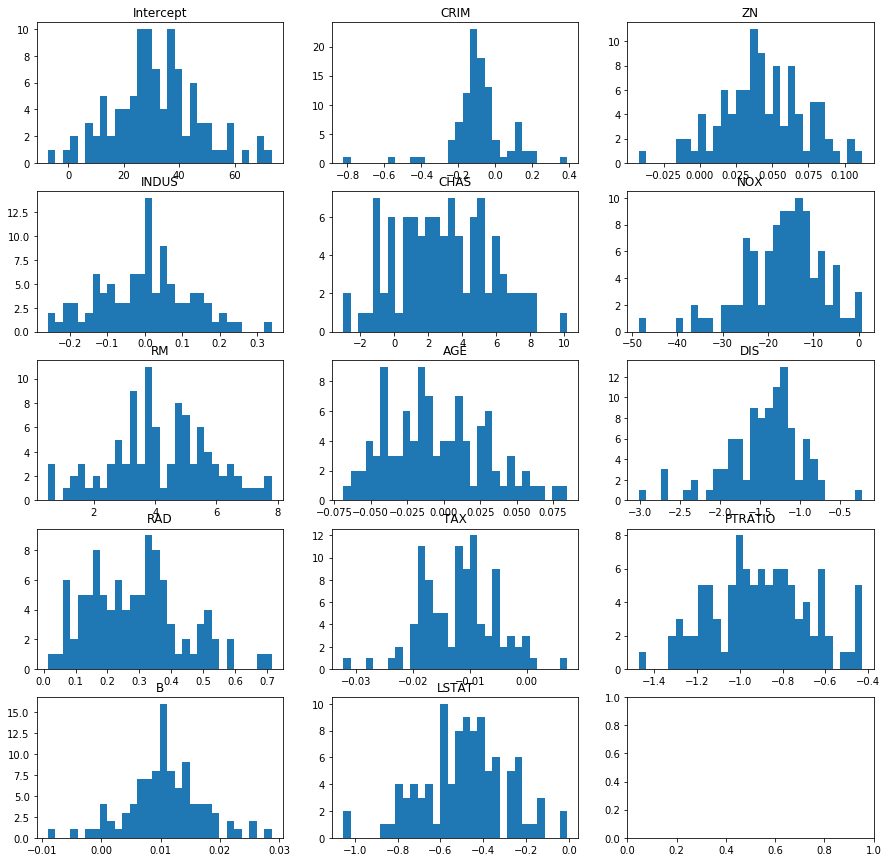

In [32]:

# Run many times, join results in a dataframe
results = pd.concat([run_experiment(boston) for i in range(100)], axis=1)

columns = results.index.values
n_columns = len(columns)

n_columns

n_rows, n_cols = 5, 3

# Output histogram plot for each varaible
# A plot with n_rows rows, n_cols cols, and sized so each is 5 by 3 (inches)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 3))

for row in range(n_rows):
    for col in range(n_cols):
        plot_number = (row * n_cols) + col
        if plot_number >= n_columns:
            break 
        column_name = columns[plot_number]
        ax = axes[row, col]
        ax.set_title(column_name)
        
        ax.hist(results.loc[column_name], bins=30)
        

*For solutions, see `solutions/histograms.py`*

### Other Important points


In the above tests, we mentioned that condition numbers above 20 are problematic. Like most things with multicollinarity, this is not a strict rule. Some people use 15, some use 30, and there is no distribution we can use to convert these to more meaningful likelihoods (as opposed to say, t-statistics).

The degree of correlation that is significant is hard to decide on. Generally, the smaller the sample, the lower the cutoff point needs to be.

That said, simply checking for correlation between two variables itself may not be sufficient to detect multicollinarity. An input variable might be a linear combination of other variables, and for this reason it might not be correlated highly with any single one of those variables. A way to think of this is whether a linear regression of some input variables would predict the other input variables.

If you have some *a priori* knowledge of a relationship, you can try replacing your input variables with that linear combination. For instance, if you know that $X_2$ should have ten times the effect of $X_1$ in your model, you can remove them from your model, create a new variable $X_3= 10X_1 + X_2$ and use that instead.

Do not just drop a variable because it causes multicollinearity. If you added it simply to experiment, then perhaps dropping it again is fine. However, if you had good reason to think that the variable belongs in your model, then don't just drop it to see if that fixes the issue. While this may address the multicollinarity, it can lead to specification error - which is when the model cannot accurately describe your output. This then has the follow on effect that your model might find unimportant-but-chance patterns between unrelated input variables and your output. This is known as overfitting. Your model is learning the random noise in your data, not the underlying trends. Simply dropping a variable may instead cause the opposite problem of underfitting, where there simply isn't enough data to properly model your output (think of using just the mean to predict the outcome, ignoring any input data).